#**Stochastic Systems Project** 
Importing all necessary libraries

In [ ]:
from collections import Counter
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression

#**Unbiased Random Walks**#

Starting by defining our coin flip function.

In [ ]:
def flip_coin(n_coins, n_times, p=0.5):
    return 2*(np.random.random((n_times, n_coins))<p)-1

Let's roll 4 independent coins 10,000 times

In [ ]:
steps = flip_coin(4, 10000)

For each HEAD=Take a STEP UP and For each TAIL=Take a STEP DOWN. The path is;


In [ ]:
position = steps.cumsum(axis=0)

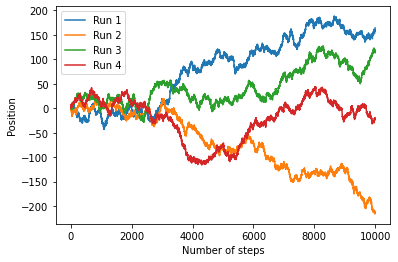

In [ ]:
plt.plot(np.arange(10000), position.T[0], label='Run 1')
plt.plot(np.arange(10000), position.T[1], label='Run 2')
plt.plot(np.arange(10000), position.T[2], label='Run 3')
plt.plot(np.arange(10000), position.T[3], label='Run 4')
plt.xlabel('Number of steps')
plt.ylabel('Position')
plt.legend()

Plotting pmf function of the given coins.

In [ ]:
def pmf(values, normed=False):
    counts = Counter(values.flatten())
    output = np.array(sorted(counts.items(), key=lambda x:x[0]), dtype='float')
    
    if normed:
        norm = output.T[1].sum()
        output.T[1] = output.T[1]/norm
    
    return output

In [ ]:
pmf1 = pmf(position.T[0])
pmf2 = pmf(position.T[1])
pmf3 = pmf(position.T[2])
pmf4 = pmf(position.T[3])

So we obtain the total histogram of visits across all four runs;

In [ ]:
total = pmf(position.flatten()) 

Plotting all four distributions together.

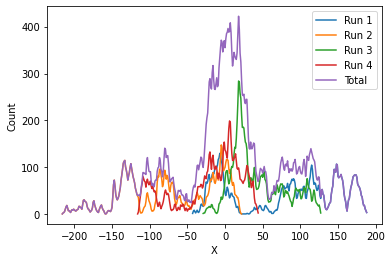

In [ ]:
plt.plot(pmf1.T[0],pmf1.T[1], label='Run 1')
plt.plot(pmf2.T[0],pmf2.T[1], label='Run 2')
plt.plot(pmf3.T[0],pmf3.T[1], label='Run 3')
plt.plot(pmf4.T[0],pmf4.T[1], label='Run 4')
plt.plot(total.T[0],total.T[1], label='Total')
plt.xlabel('X')
plt.ylabel('Count')
plt.legend()

#**Biased Random Walks**

If the coin is unfair, we will have a drift in one direction or the other.

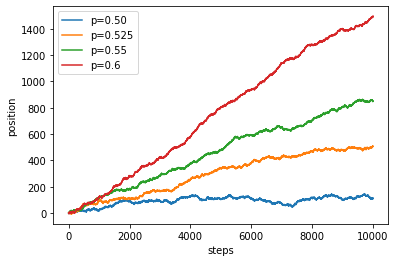

In [ ]:
plt.plot(np.arange(10000), flip_coin(1, 1_0000, 0.5).cumsum(), label='p=0.50')
plt.plot(np.arange(10000), flip_coin(1, 1_0000, 0.525).cumsum(), label='p=0.525')
plt.plot(np.arange(10000), flip_coin(1, 1_0000, 0.55).cumsum(), label='p=0.55')
plt.plot(np.arange(10000), flip_coin(1, 1_0000, 0.58).cumsum(), label='p=0.6')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

Naturally, the more unfair the coin, the more biased the walk. In 2 (or more) dimensions the situation is similar, the only difference being that we must chose among more possible moves using more coins.

Text(0, 0.5, 'y')

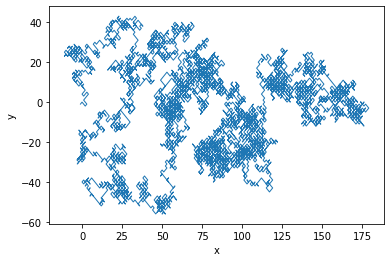

In [ ]:
position2D = flip_coin(2, 10000).cumsum(axis=0)
plt.plot(position2D.T[0], position2D.T[1], lw=1)
plt.xlabel('x')
plt.ylabel('y')

#**Levy Flights**

In Levy flights, the steps can take any direction and be of varying length as well.

In [ ]:
def levyFlight(Nsteps):
    R = np.random.pareto(2, Nsteps)
    theta = 2*np.pi*np.random.random(Nsteps)
    
    x = (R*np.cos(theta)).cumsum()
    y = (R*np.sin(theta)).cumsum()
    
    return [x, y]

Where we are choosing uniformly the direction of movement and the distance from a broad tailed distribution, resulting in occasionally extremely large jumps as observed in the foraging behavior of certain animals

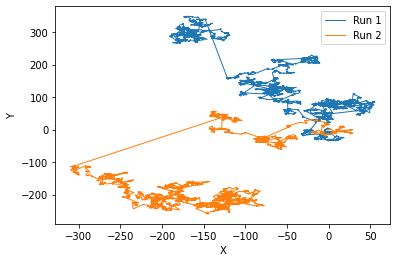

In [ ]:
lfx1, lfy1 = levyFlight(10000)
lfx2, lfy2 = levyFlight(10000)

plt.plot(lfx1, lfy1, label='Run 1', lw=1)
plt.plot(lfx2, lfy2, label='Run 2', lw=1)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

#**Page Rank**

One particularly interesting application of random walks is in PageRank, the algorithm underlying the Google search engine. Here we apply it to the celegans network of 297 neurons.

In [ ]:
N = 297
A = np.zeros((N, N))

In [ ]:
import scipy.io as sio
GOOGLE_COLAB = True
path = "" 
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/Stochastic_Systems/"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import files
Upload=files.upload()

Saving celegans.txt to celegans (1).txt


In [ ]:
Upload

{'celegans.txt': b'0 1\r\n0 2\r\n0 3\r\n0 4\r\n0 5\r\n0 6\r\n0 7\r\n0 8\r\n0 9\r\n0 134\r\n0 201\r\n1 0\r\n1 7\r\n1 10\r\n1 12\r\n1 16\r\n1 72\r\n1 74\r\n1 84\r\n1 101\r\n1 102\r\n1 108\r\n1 113\r\n1 115\r\n1 116\r\n1 124\r\n1 127\r\n1 129\r\n1 130\r\n1 131\r\n1 135\r\n1 136\r\n1 138\r\n1 140\r\n1 141\r\n1 142\r\n1 193\r\n1 195\r\n1 214\r\n1 241\r\n2 0\r\n2 4\r\n2 7\r\n2 8\r\n2 12\r\n2 16\r\n2 20\r\n2 21\r\n2 63\r\n2 67\r\n2 72\r\n2 84\r\n2 86\r\n2 87\r\n2 89\r\n2 98\r\n2 99\r\n2 101\r\n2 109\r\n2 111\r\n2 114\r\n2 118\r\n2 121\r\n2 125\r\n2 129\r\n2 151\r\n2 152\r\n2 153\r\n2 154\r\n2 155\r\n2 156\r\n2 157\r\n2 158\r\n2 159\r\n2 160\r\n2 161\r\n2 162\r\n2 163\r\n2 164\r\n2 165\r\n2 166\r\n2 167\r\n2 168\r\n2 169\r\n2 170\r\n2 172\r\n2 173\r\n2 175\r\n2 176\r\n2 177\r\n2 178\r\n2 179\r\n2 180\r\n2 181\r\n2 182\r\n2 183\r\n2 184\r\n2 185\r\n2 186\r\n2 193\r\n2 194\r\n2 201\r\n2 203\r\n2 204\r\n2 207\r\n2 212\r\n2 220\r\n2 224\r\n2 225\r\n2 226\r\n2 239\r\n2 248\r\n2 255\r\n2 257\r\n3 0\

In [ ]:
file_name='celegans.txt'
Upload[file_name].decode("utf-8")


'0 1\r\n0 2\r\n0 3\r\n0 4\r\n0 5\r\n0 6\r\n0 7\r\n0 8\r\n0 9\r\n0 134\r\n0 201\r\n1 0\r\n1 7\r\n1 10\r\n1 12\r\n1 16\r\n1 72\r\n1 74\r\n1 84\r\n1 101\r\n1 102\r\n1 108\r\n1 113\r\n1 115\r\n1 116\r\n1 124\r\n1 127\r\n1 129\r\n1 130\r\n1 131\r\n1 135\r\n1 136\r\n1 138\r\n1 140\r\n1 141\r\n1 142\r\n1 193\r\n1 195\r\n1 214\r\n1 241\r\n2 0\r\n2 4\r\n2 7\r\n2 8\r\n2 12\r\n2 16\r\n2 20\r\n2 21\r\n2 63\r\n2 67\r\n2 72\r\n2 84\r\n2 86\r\n2 87\r\n2 89\r\n2 98\r\n2 99\r\n2 101\r\n2 109\r\n2 111\r\n2 114\r\n2 118\r\n2 121\r\n2 125\r\n2 129\r\n2 151\r\n2 152\r\n2 153\r\n2 154\r\n2 155\r\n2 156\r\n2 157\r\n2 158\r\n2 159\r\n2 160\r\n2 161\r\n2 162\r\n2 163\r\n2 164\r\n2 165\r\n2 166\r\n2 167\r\n2 168\r\n2 169\r\n2 170\r\n2 172\r\n2 173\r\n2 175\r\n2 176\r\n2 177\r\n2 178\r\n2 179\r\n2 180\r\n2 181\r\n2 182\r\n2 183\r\n2 184\r\n2 185\r\n2 186\r\n2 193\r\n2 194\r\n2 201\r\n2 203\r\n2 204\r\n2 207\r\n2 212\r\n2 220\r\n2 224\r\n2 225\r\n2 226\r\n2 239\r\n2 248\r\n2 255\r\n2 257\r\n3 0\r\n3 5\r\n3 7\r\n3

We read the network structure directly from a file and initialize the adjacency matrix, where every element is zero except in the elements corresponding to existing connections

In [ ]:
Upload[file_name].decode("utf-8").split("\r\n")

['0 1',
 '0 2',
 '0 3',
 '0 4',
 '0 5',
 '0 6',
 '0 7',
 '0 8',
 '0 9',
 '0 134',
 '0 201',
 '1 0',
 '1 7',
 '1 10',
 '1 12',
 '1 16',
 '1 72',
 '1 74',
 '1 84',
 '1 101',
 '1 102',
 '1 108',
 '1 113',
 '1 115',
 '1 116',
 '1 124',
 '1 127',
 '1 129',
 '1 130',
 '1 131',
 '1 135',
 '1 136',
 '1 138',
 '1 140',
 '1 141',
 '1 142',
 '1 193',
 '1 195',
 '1 214',
 '1 241',
 '2 0',
 '2 4',
 '2 7',
 '2 8',
 '2 12',
 '2 16',
 '2 20',
 '2 21',
 '2 63',
 '2 67',
 '2 72',
 '2 84',
 '2 86',
 '2 87',
 '2 89',
 '2 98',
 '2 99',
 '2 101',
 '2 109',
 '2 111',
 '2 114',
 '2 118',
 '2 121',
 '2 125',
 '2 129',
 '2 151',
 '2 152',
 '2 153',
 '2 154',
 '2 155',
 '2 156',
 '2 157',
 '2 158',
 '2 159',
 '2 160',
 '2 161',
 '2 162',
 '2 163',
 '2 164',
 '2 165',
 '2 166',
 '2 167',
 '2 168',
 '2 169',
 '2 170',
 '2 172',
 '2 173',
 '2 175',
 '2 176',
 '2 177',
 '2 178',
 '2 179',
 '2 180',
 '2 181',
 '2 182',
 '2 183',
 '2 184',
 '2 185',
 '2 186',
 '2 193',
 '2 194',
 '2 201',
 '2 203',
 '2 204',
 '2 207',

In [ ]:

for line in open("celegans.txt"):
    node_i, node_j = line.strip().split()

    node_i = int(node_i)
    node_j = int(node_j)

    A[node_i, node_j] = 1

The number of connections for each node can be obtained by summing the number of non-zero elements

In [ ]:
K_i = A.sum(axis=0)

The degree distribution is

In [ ]:
Pk = pmf(K_i)

Text(0, 0.5, 'N(K)')

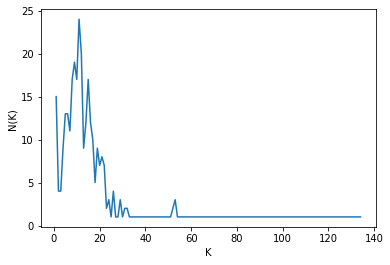

In [ ]:
plt.plot(Pk.T[0], Pk.T[1])
plt.xlabel('K')
plt.ylabel('N(K)')

So we can see that most nodes have degrees below 20 while a few can have degrees as high as 134.

The Google Matrix is defined from the Adjacenty matrix by adding the atenuation factor and removing dangling nodes

In [ ]:
def Google_Matrix(A, m):
    N = A.shape[0]
    v = np.ones(N)

    KT = np.dot(A.T, v)

    for i in range(N):
        A.T[i] = A.T[i]/KT[i]

    S = np.ones((N, N))/N
    G = (1-m)*A+m*S

    return G

Finally, we define a function to implement the power method

In [ ]:
def Power_Method(G, iter):
    N = G.shape[0]
    x0 = np.ones(N)/N

    for i in range(iter):
        x0 = np.dot(G, x0)

    return x0

In [ ]:
G = Google_Matrix(A, 0.15)
x0 = Power_Method(G, 10000)

we can plot the PageRank value of each node

Text(0, 0.5, 'PageRank')

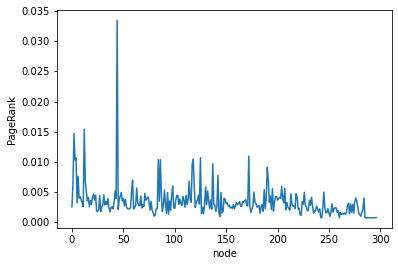

In [ ]:
plt.plot(x0)
plt.xlabel('node')
plt.ylabel('PageRank')

As expected, some nodes have much higher values than others, corresponding to their mode central location in the network. However, PageRank is sensitive to not only local connections (degree) but also higher order relations so that it is not simply proportional to the degree of each node

Text(0, 0.5, 'PageRank')

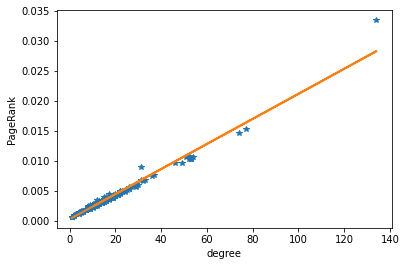

In [ ]:
lm = LinearRegression()
lm.fit(K_i.reshape(-1, 1), x0.reshape(-1, 1))

plt.plot(K_i, x0, '*')
plt.plot(K_i, lm.predict(K_i.reshape(-1, 1)), '-', lw=2)
plt.xlabel('degree')
plt.ylabel('PageRank')

#**Random Walk vs Stock Market**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import *
from sklearn.metrics import mean_squared_error
import random
import os


In [6]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.0 MB/s 
     |████████████████████████████████| 128 kB 9.6 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 54.3 MB/s 
     |████████████████████████████████| 112 kB 76.1 MB/s 
     |████████████████████████████████| 110 kB 73.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [7]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '1990-01-01'
end_date = '2021-07-12'

# Set the ticker
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-02,172.582001,175.585999,171.845993,175.548996,175.548996,63388000
2021-07-06,176.505493,184.274002,176.449997,183.787003,183.787003,134896000
2021-07-07,185.869003,186.710007,183.945496,184.828995,184.828995,106562000
2021-07-08,182.177994,187.999496,181.056000,186.570496,186.570496,103612000
2021-07-09,186.126007,187.399994,184.669998,185.966995,185.966995,74964000


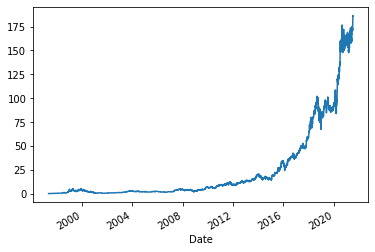

In [8]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

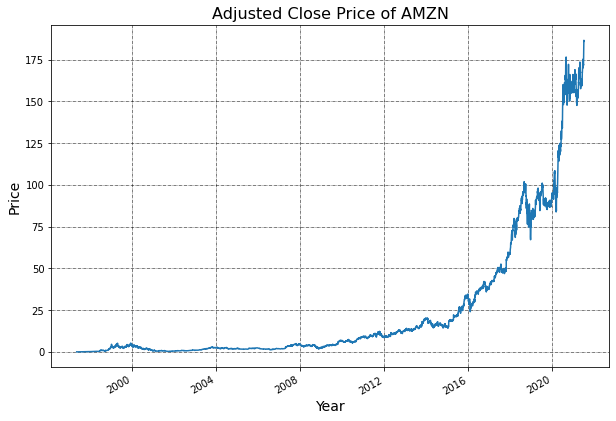

In [9]:
data['Adj Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()